## Feature Examination ADNI dataset

In [162]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Build the CVD training dataset
I need to load the core spreadsheet, and load the extra spreadsheet where required
Then I need to match the IDs. THen we have a spreadsheet that we can fit a logistic regression model with

In [163]:
ADNI_core_df = pd.read_csv("../umap_data_spreadsheets/ADNI/clinscore_data.csv")

In [164]:
ADNI_core_df

,Unnamed: 0,Patient ID,AGE,Ventricles_bl %,Hippocampus_bl %,WholeBrain_bl %,Entorhinal_bl %,Fusiform_bl %,MidTemp_bl %,BMI,...,DX.bl_1,DX.bl_2,DX.bl_3,CV RISK FACTORS_0,CV RISK FACTORS_1,CV RISK FACTORS_2,APOE4_0,APOE4_1,APOE4_2,totatal_fazekas
0,0,002_S_0729,-0.907124,-0.599118,0.209110,0.410522,-0.386959,0.803329,0.252266,-0.935346,...,0,1,0,0,1,0,0,1,0,4.0
1,1,002_S_1155,-1.913287,-1.640056,-2.956800,-3.247881,-2.848414,-3.151439,-3.172560,-0.778481,...,0,1,0,0,1,0,1,0,0,1.0
2,2,002_S_1261,-0.080140,0.097730,-0.155410,0.197169,-0.629183,0.049800,0.232463,-0.908899,...,0,0,0,0,0,1,1,0,0,2.0
3,3,002_S_1280,-0.135273,-0.490720,0.148831,0.182368,0.396004,0.125605,-0.024744,2.393686,...,0,0,0,0,0,1,0,1,0,5.0
4,4,002_S_2010,-1.210351,-0.724175,0.889532,0.357138,0.261112,0.243122,0.582234,3.287072,...,1,0,0,0,1,0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,278,941_S_4255,0.099039,0.032813,-0.126676,0.208292,0.009422,0.287841,0.377825,0.013404,...,0,0,0,1,0,0,0,1,0,1.0
279,279,941_S_4292,-0.107707,-0.280526,0.599915,0.374701,0.714687,0.126096,0.437157,-0.017095,...,0,0,0,0,1,0,1,0,0,1.0
280,280,941_S_4365,1.187900,1.205062,-0.016664,0.101020,0.432068,0.203846,-0.216243,-0.803431,...,0,0,0,0,0,1,1,0,0,2.0
281,281,941_S_4376,0.664144,-1.640056,-2.956800,-3.247881,-2.848414,-3.151439,-3.172560,0.442142,...,0,0,0,0,1,0,1,0,0,4.0


### Add the sample diversity data

In [165]:
data_folder = "../umap_data_spreadsheets/ADNI/"
all_data_files = os.listdir(data_folder)
sample_div_files = [f for f in all_data_files if "sample_div" in f and "CHAL" not in f]

dfs = [pd.read_csv(data_folder + f) for f in sample_div_files]

sample_div_df = pd.concat(dfs)

In [166]:
sample_div_df['Patient ID'] = ["_".join(full_id.split("_")[1:4]) for full_id in sample_div_df['ID']] # create the patient ID column that matches the information from the main clinscore dataframe
sample_div_df = sample_div_df.drop(columns='ID')
sample_div_df.drop(columns='Unnamed: 0')

,sample_div_std,sample_div_IQR,sample_div_skew,sample_div_vd_std,sample_div_vd_IQR,sample_div_vd_skew,Patient ID
0,3165.602783,2344.00,1.259648,45.564117,33.258059,1.734809,002_S_0729
1,1500.794556,316.50,2.523724,214.115723,42.503748,2.605550,002_S_1155
2,984.366455,822.00,1.676786,97.116333,55.545779,2.096768,002_S_1261
3,2366.137207,2142.50,1.318302,43.439651,28.032471,1.833706,002_S_1280
4,551.981506,281.00,2.009506,116.312363,30.737704,2.307648,002_S_2010
...,...,...,...,...,...,...,...
65,1340.650879,1124.50,0.947765,17.509907,18.088124,1.368978,037_S_4030
66,5039.496094,5252.75,0.889418,51.533592,34.469697,1.529226,037_S_4071
67,821.232239,427.50,1.849751,58.431202,33.397109,2.259267,037_S_4146
68,917.745789,480.75,1.880684,57.204422,25.282686,2.156726,037_S_4214


In [167]:
ADNI_core_df = ADNI_core_df.merge(sample_div_df, on="Patient ID")



In [168]:
ADNI_core_df

,Unnamed: 0_x,Patient ID,AGE,Ventricles_bl %,Hippocampus_bl %,WholeBrain_bl %,Entorhinal_bl %,Fusiform_bl %,MidTemp_bl %,BMI,...,APOE4_1,APOE4_2,totatal_fazekas,Unnamed: 0_y,sample_div_std,sample_div_IQR,sample_div_skew,sample_div_vd_std,sample_div_vd_IQR,sample_div_vd_skew
0,0,002_S_0729,-0.907124,-0.599118,0.209110,0.410522,-0.386959,0.803329,0.252266,-0.935346,...,1,0,4.0,0,3165.602783,2344.00,1.259648,45.564117,33.258059,1.734809
1,1,002_S_1155,-1.913287,-1.640056,-2.956800,-3.247881,-2.848414,-3.151439,-3.172560,-0.778481,...,0,0,1.0,1,1500.794556,316.50,2.523724,214.115723,42.503748,2.605550
2,2,002_S_1261,-0.080140,0.097730,-0.155410,0.197169,-0.629183,0.049800,0.232463,-0.908899,...,0,0,2.0,2,984.366455,822.00,1.676786,97.116333,55.545779,2.096768
3,3,002_S_1280,-0.135273,-0.490720,0.148831,0.182368,0.396004,0.125605,-0.024744,2.393686,...,1,0,5.0,3,2366.137207,2142.50,1.318302,43.439651,28.032471,1.833706
4,4,002_S_2010,-1.210351,-0.724175,0.889532,0.357138,0.261112,0.243122,0.582234,3.287072,...,1,0,2.0,4,551.981506,281.00,2.009506,116.312363,30.737704,2.307648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,278,941_S_4255,0.099039,0.032813,-0.126676,0.208292,0.009422,0.287841,0.377825,0.013404,...,1,0,1.0,75,778.726196,615.25,0.531293,24.632231,22.083334,1.248658
272,279,941_S_4292,-0.107707,-0.280526,0.599915,0.374701,0.714687,0.126096,0.437157,-0.017095,...,0,0,1.0,76,671.989685,451.50,1.726194,54.628632,32.234252,2.219728
273,280,941_S_4365,1.187900,1.205062,-0.016664,0.101020,0.432068,0.203846,-0.216243,-0.803431,...,0,0,2.0,77,2232.982178,1946.00,1.280141,80.408051,58.250106,1.736020
274,281,941_S_4376,0.664144,-1.640056,-2.956800,-3.247881,-2.848414,-3.151439,-3.172560,0.442142,...,0,0,4.0,78,1172.379761,1076.50,0.995781,25.841782,24.522870,1.648018


In [169]:
ADNI_core_df.keys()

Index(['Unnamed: 0_x', 'Patient ID', 'AGE', 'Ventricles_bl %',
       'Hippocampus_bl %', 'WholeBrain_bl %', 'Entorhinal_bl %',
       'Fusiform_bl %', 'MidTemp_bl %', 'BMI', 'WMH_PV', 'WMH_Deep', 'Total',
       'PTGENDER', 'E-M RISK FACTORS', 'DX.bl_0', 'DX.bl_1', 'DX.bl_2',
       'DX.bl_3', 'CV RISK FACTORS_0', 'CV RISK FACTORS_1',
       'CV RISK FACTORS_2', 'APOE4_0', 'APOE4_1', 'APOE4_2', 'totatal_fazekas',
       'Unnamed: 0_y', 'sample_div_std', 'sample_div_IQR', 'sample_div_skew',
       'sample_div_vd_std', 'sample_div_vd_IQR', 'sample_div_vd_skew'],
      dtype='object')

### Explore how base features vary with Fazekas (and what the class balance is)

In [170]:
sns.set_style("whitegrid")

In [171]:
def get_uniques(df, key):
    values = df[key].values
    uniques = np.unique(values)
    uniques = uniques[np.logical_not(np.isnan(uniques))] # remove nan, if it is there
    return uniques

In [172]:
def simple_hist_bar_plot(ax, df, key, xlabel, color='#1cdaeb'):
    ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=0)
    ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=0)
    classes = get_uniques(df, key)
    values = df[key].values
    counts = [0 for _ in range(len(classes))]
    for i, c in enumerate(classes):
        counts[i] = np.sum(values == c)
    ax.bar(classes, counts, zorder=2, color=color); # zorder 2 is above grid but below axis (3 puts it above the axis
    if xlabel == None:
        xlabel = key
    ax.set_xlabel(xlabel)
    ax.set_ylabel("count")
    ax.set_xticks(classes)
    ax.spines[['top','right']].set_visible(False) # Remove the top and right spines
    ax.spines[['left', 'bottom']].set_linewidth(1.1) # make the left and bottom spines thicker#
    ax.spines[['left', 'bottom']].set_color('#585858')

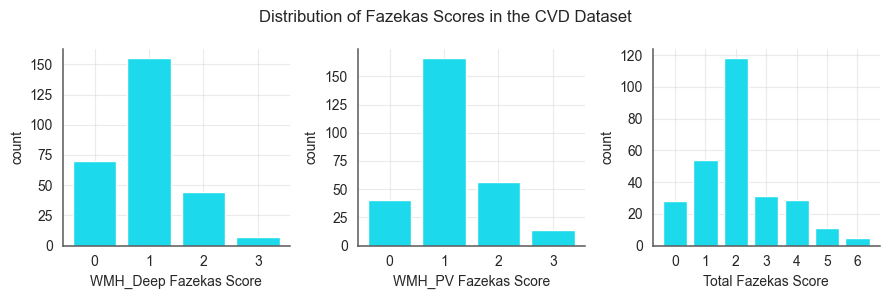

In [173]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
simple_hist_bar_plot(axs[0], ADNI_core_df, 'WMH_Deep', 'WMH_Deep Fazekas Score')
simple_hist_bar_plot(axs[1], ADNI_core_df, 'WMH_PV', 'WMH_PV Fazekas Score')
simple_hist_bar_plot(axs[2], ADNI_core_df, 'Total', 'Total Fazekas Score')
plt.suptitle("Distribution of Fazekas Scores in the CVD Dataset")
fig.tight_layout()

### How does predicted WMH volume predict fazekas score?

In [174]:
def simple_box_plot(ax, df, x, y, xlabel=None, ylabel=None, logy=False, logx=False, kind='box'):
    if kind == 'box':
        ax = sns.boxplot(data=df, x=x, y=y, ax=ax)
    elif kind == 'violin':
        ax = sns.violinplot(data=df, x=x, y=y, ax=ax, cut=0, bw=.15)
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.spines[['top','right']].set_visible(False) # Remove the top and right spines
    ax.spines[['left', 'bottom']].set_linewidth(1.1) # make the left and bottom spines thicker#
    ax.spines[['left', 'bottom']].set_color('#585858')
    if logy:
        ax.set_yscale('log')
    if logx:
        ax.set_xscale('log')

In [175]:
def simple_scatter_plot(ax, df, x, y, hue=None, xlabel=None, ylabel=None, logy=False, logx=False):
    ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.spines[['top','right']].set_visible(False) # Remove the top and right spines
    ax.spines[['left', 'bottom']].set_linewidth(1.1) # make the left and bottom spines thicker#
    ax.spines[['left', 'bottom']].set_color('#585858')
    if logy:
        ax.set_yscale('log')
    if logx:
        ax.set_xscale('log')
    print(get_uniques(df, hue))
    plt.legend(loc='lower right', title=hue)

### Add Umap feature data

In [176]:
def load_model_output_stats(output_type, threshold, fields=None):
    df = pd.read_csv(f"../umap_data_spreadsheets/ADNI/{output_type}_{threshold}.csv")
    if fields != None:
        return df[fields]
    return df

In [177]:
def merge_datasets(core_df, output_types, thresholds, selected_fields):
    for output_type, thresh, fields in zip(output_types, thresholds, selected_fields):
        
        extra_df = load_model_output_stats(output_type, thresh, fields) # load the specific output type at the given threshold, and select the desired fields
        
        extra_df['Patient ID'] = ["_".join(full_id.split("_")[1:4]) for full_id in extra_df['ID']] # create the patient ID column that matches the information from the main clinscore dataframe
        extra_df = extra_df.drop(columns='ID')
        # print(extra_df['Patient ID'].values)
        extra_df = extra_df.rename(columns={key: f"{output_type}{thresh}_{key}" if key != 'Patient ID' else 'Patient ID' for key in extra_df.keys()}) # modify the column name so that we know which columns belong to which input type
        
        # print(len(core_df))
        core_df = core_df.merge(extra_df, on="Patient ID")
        
    
    core_df = core_df.drop(columns='Patient ID')       
    
    return core_df

In [178]:
all_image_extracted_fields = ['cc_num', 'cc_unsegmented_ccs', 'cc_size_mean',
       'cc_size_std', 'cc_size_skew', 'cc_size_kurt', 'cc_vd_mean',
       'cc_vd_std', 'cc_vd_skew', 'cc_vd_kurt', 'sum', 'mean', 'std', 'skew',
       'kurtosis', 'prop_umap_segmented', 'prop_umap_within_expanded_seg',
       'prop_seg_uncertain', 'dist_mean', 'dist_std', 'dist_skew', 'dist_kurt',
       'dist_value_joint_0', 'dist_value_joint_1', 'dist_value_joint_2',
       'dist_value_joint_3', 'dist_value_joint_4', 'dist_value_joint_5',
       'dist_value_joint_6', 'dist_value_joint_7', 'dist_value_joint_8',
       'dist_value_joint_9', 'dist_value_joint_10', 'dist_value_joint_11',
       'dist_value_joint_12', 'dist_value_joint_13', 'dist_value_joint_14',
       'dist_value_joint_15', 'dist_value_joint_16', 'dist_value_joint_17',
       'dist_value_joint_18', 'dist_value_joint_19', 'dist_value_joint_20',
       'dist_value_joint_21', 'dist_value_joint_22', 'dist_value_joint_23',
       'dist_value_joint_24', 'cc_dist_value_joint_0', 'cc_dist_value_joint_1',
       'cc_dist_value_joint_2', 'cc_dist_value_joint_3',
       'cc_dist_value_joint_4', 'cc_dist_value_joint_5',
       'cc_dist_value_joint_6', 'cc_dist_value_joint_7',
       'cc_dist_value_joint_8', 'cc_dist_value_joint_9',
       'cc_dist_value_joint_10', 'cc_dist_value_joint_11',
       'cc_dist_value_joint_12', 'cc_dist_value_joint_13',
       'cc_dist_value_joint_14', 'cc_dist_value_joint_15',
       'cc_dist_value_joint_16', 'cc_dist_value_joint_17',
       'cc_dist_value_joint_18', 'cc_dist_value_joint_19',
       'cc_dist_value_joint_20', 'cc_dist_value_joint_21',
       'cc_dist_value_joint_22', 'cc_dist_value_joint_23',
       'cc_dist_value_joint_24', 'values_hist_0',
       'values_hist_1', 'values_hist_2', 'values_hist_3', 'values_hist_4',
       'values_hist_5', 'values_hist_6', 'values_hist_7', 'values_hist_8',
       'values_hist_9', 'values_hist_10', 'values_hist_11', 'values_hist_12',
       'values_hist_13', 'values_hist_14', 'values_hist_15', 'values_hist_16',
       'values_hist_17', 'values_hist_18', 'values_hist_19']

pred_values = ['seg_volume', 'vent_volume']

In [179]:
added_inputs = ["pred", "ent", "ent", "ent", "ent", "pred", "pred", "pred", "pred", "var"]
thresholds = [0.5, 0.1, 0.3, 0.2, 0.45, 0.1, 0.3, 0.5, 0.6, 0.06]
# added_fields = [['cc_num', 'cc_unsegmented_ccs', 'cc_size_mean'], ['kurtosis', 'prop_umap_segmented', 'prop_umap_within_expanded_seg'], ['kurtosis']]
added_fields = [pred_values, all_image_extracted_fields, all_image_extracted_fields, all_image_extracted_fields, all_image_extracted_fields, all_image_extracted_fields, all_image_extracted_fields, all_image_extracted_fields, all_image_extracted_fields]
added_fields = [f+['ID'] for f in added_fields]

included_terms = [0, 1,2,3,4,5,6, 7, 8]#0]#, 2]#, 1]#, 3]
added_inputs = [added_inputs[idx] for idx in included_terms]
thresholds = [thresholds[idx] for idx in included_terms]
added_fields = [added_fields[idx] for idx in included_terms]

core_fields = ADNI_core_df.keys()

In [180]:
combined_df = merge_datasets(ADNI_core_df[core_fields], added_inputs, thresholds, added_fields)

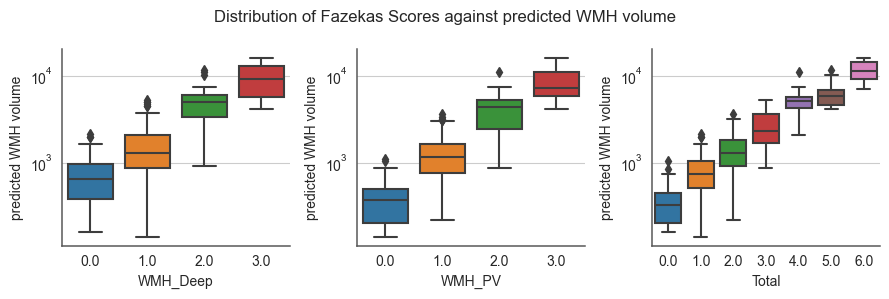

In [181]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
simple_box_plot(axs[0], combined_df, x='WMH_Deep', y='pred0.5_seg_volume', ylabel="predicted WMH volume", logy=True)
simple_box_plot(axs[1], combined_df, x='WMH_PV', y='pred0.5_seg_volume', ylabel="predicted WMH volume", logy=True)
simple_box_plot(axs[2], combined_df, x='Total', y='pred0.5_seg_volume', xlabel='Total', ylabel="predicted WMH volume", logy=True)
plt.suptitle("Distribution of Fazekas Scores against predicted WMH volume")
fig.tight_layout()

### examine how each feature distributes with volume and fazekas category (WMH_PV, WMH_Deep, Total, then GT predicted WMH volume)
dice, lesion f1, avd, sample_div_std, sample_div_IQR, sample_div_skew, and vd equivalents

In [182]:
def quad_fazekas_comparison_plot_box(df, y, ylabel, kind='box', logy=False):
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    simple_box_plot(axs[0], df, x='WMH_Deep', y=y, ylabel=ylabel, kind=kind, logy=logy)
    simple_box_plot(axs[1], df, x='WMH_PV', y=y, ylabel=ylabel, kind=kind, logy=logy)
    simple_box_plot(axs[2], df, x='Total', y=y, xlabel='Total', ylabel=ylabel, kind=kind, logy=logy)
    simple_scatter_plot(axs[3], df, x=y, y='pred0.5_seg_volume', hue='WMH_Deep', xlabel=ylabel, ylabel="predicted WMH volume", logy=True, logx=logy)
    if ylabel == None:
        ylabel = y
    plt.suptitle(f"Distribution of {ylabel} across Fazekas Scores")
    fig.tight_layout()

In [183]:
ADNI_core_df.keys()

Index(['Unnamed: 0_x', 'Patient ID', 'AGE', 'Ventricles_bl %',
       'Hippocampus_bl %', 'WholeBrain_bl %', 'Entorhinal_bl %',
       'Fusiform_bl %', 'MidTemp_bl %', 'BMI', 'WMH_PV', 'WMH_Deep', 'Total',
       'PTGENDER', 'E-M RISK FACTORS', 'DX.bl_0', 'DX.bl_1', 'DX.bl_2',
       'DX.bl_3', 'CV RISK FACTORS_0', 'CV RISK FACTORS_1',
       'CV RISK FACTORS_2', 'APOE4_0', 'APOE4_1', 'APOE4_2', 'totatal_fazekas',
       'Unnamed: 0_y', 'sample_div_std', 'sample_div_IQR', 'sample_div_skew',
       'sample_div_vd_std', 'sample_div_vd_IQR', 'sample_div_vd_skew'],
      dtype='object')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


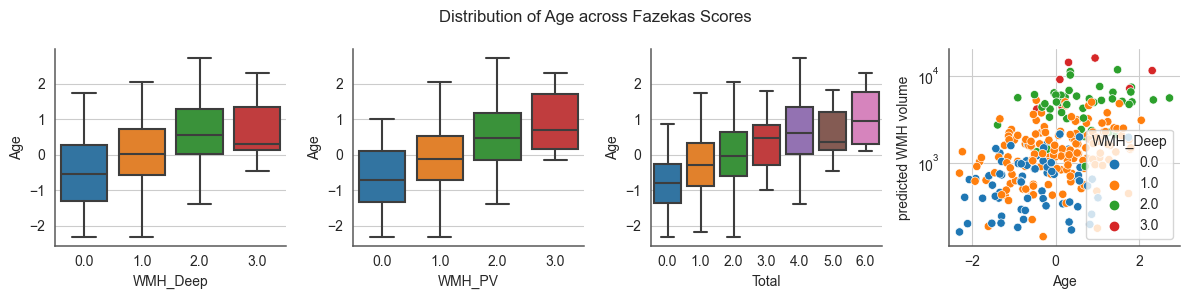

In [184]:
quad_fazekas_comparison_plot_box(combined_df, y='AGE', ylabel='Age')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


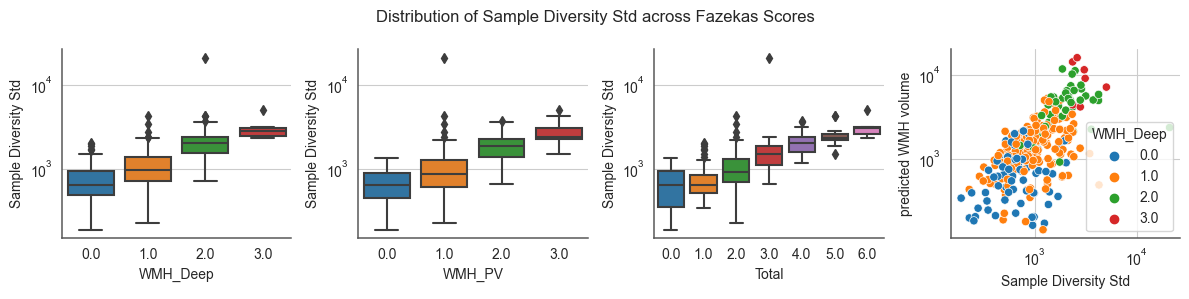

In [186]:
quad_fazekas_comparison_plot_box(combined_df, y='sample_div_std', ylabel='Sample Diversity Std', kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


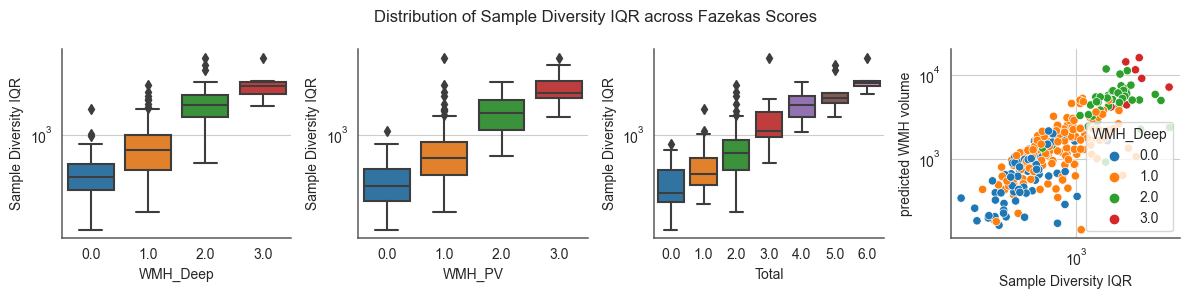

In [188]:
quad_fazekas_comparison_plot_box(combined_df, y='sample_div_IQR', ylabel='Sample Diversity IQR', kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


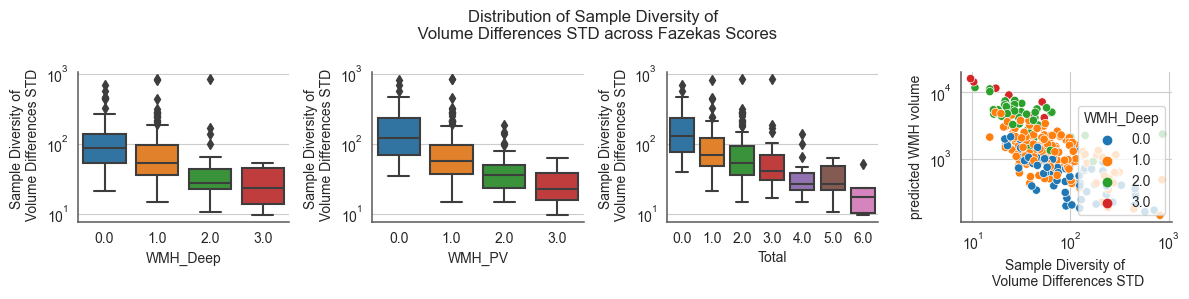

In [189]:
quad_fazekas_comparison_plot_box(combined_df, y='sample_div_vd_std', ylabel='Sample Diversity of \n Volume Differences STD', kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


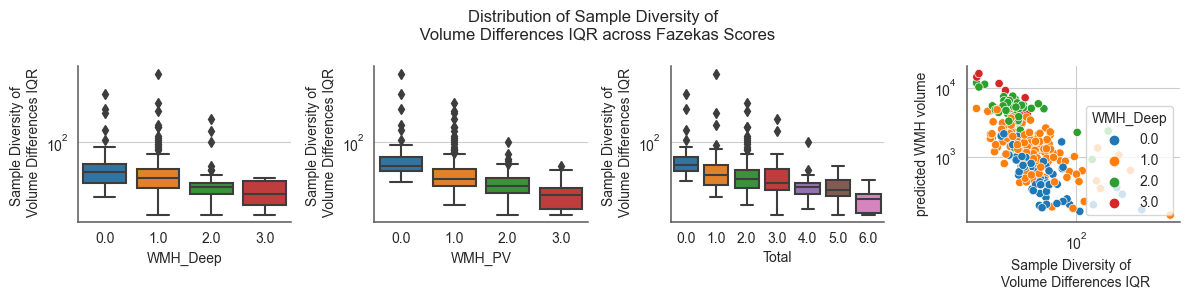

In [191]:
quad_fazekas_comparison_plot_box(combined_df, y='sample_div_vd_IQR', ylabel='Sample Diversity of \n Volume Differences IQR', kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


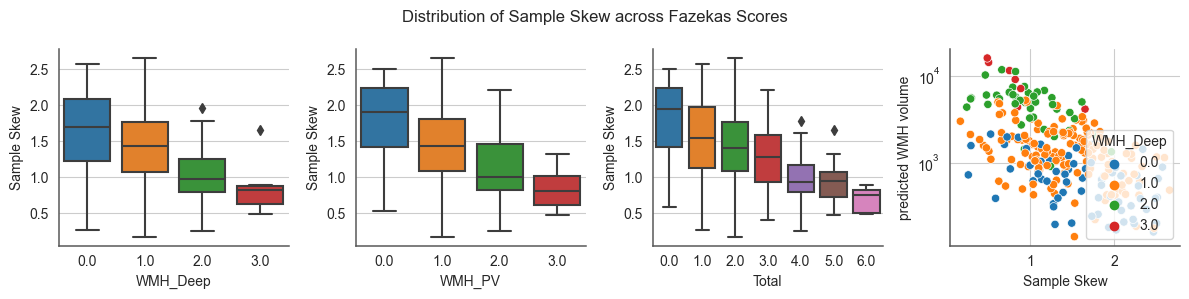

In [192]:
quad_fazekas_comparison_plot_box(combined_df, y='sample_div_skew', ylabel='Sample Skew', kind='box')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


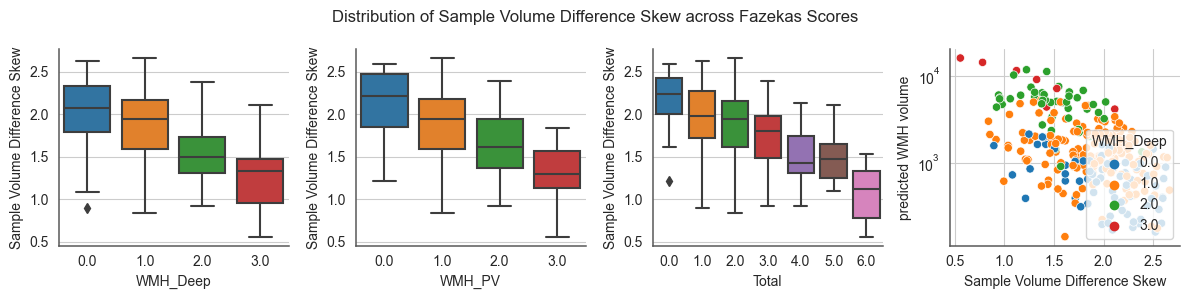

In [193]:
quad_fazekas_comparison_plot_box(combined_df, y='sample_div_vd_skew', ylabel='Sample Volume Difference Skew', kind='box')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


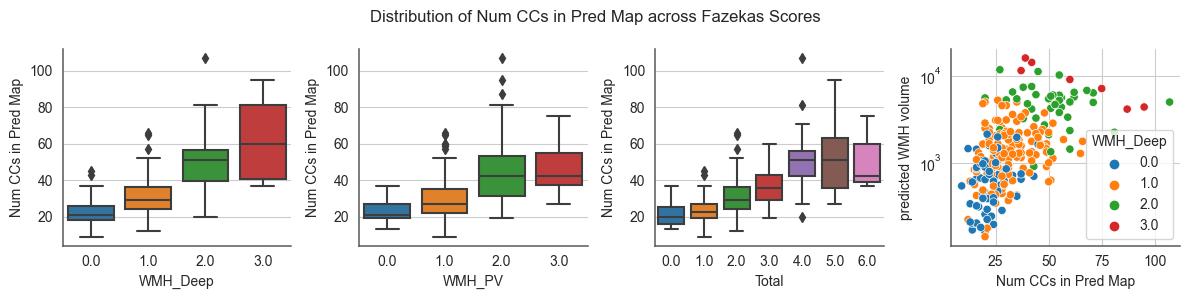

In [194]:
quad_fazekas_comparison_plot_box(combined_df, y='pred0.5_cc_num', ylabel='Num CCs in Pred Map', kind='box')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


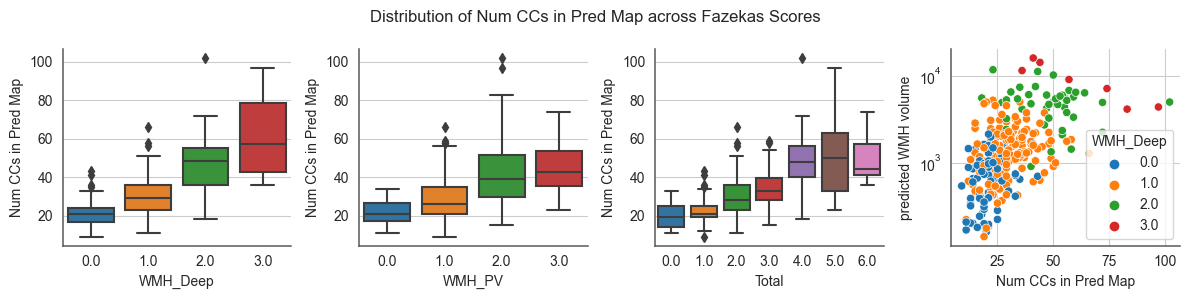

In [195]:
quad_fazekas_comparison_plot_box(combined_df, y='pred0.6_cc_num', ylabel='Num CCs in Pred Map', kind='box')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


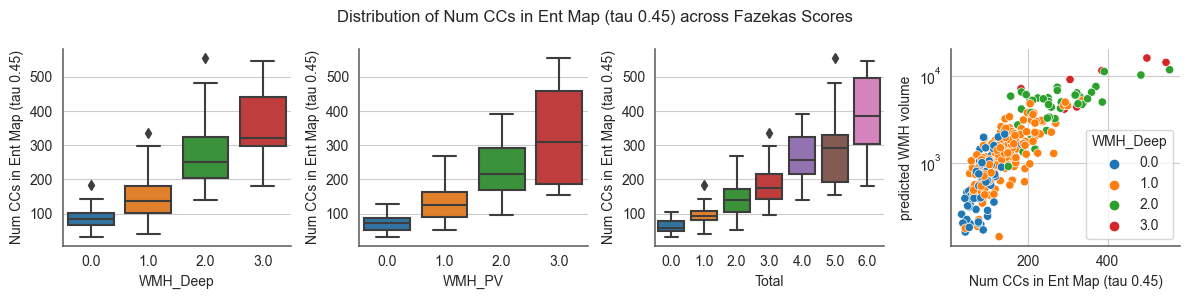

In [196]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.45_cc_num', ylabel='Num CCs in Ent Map (tau 0.45)', kind='box')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


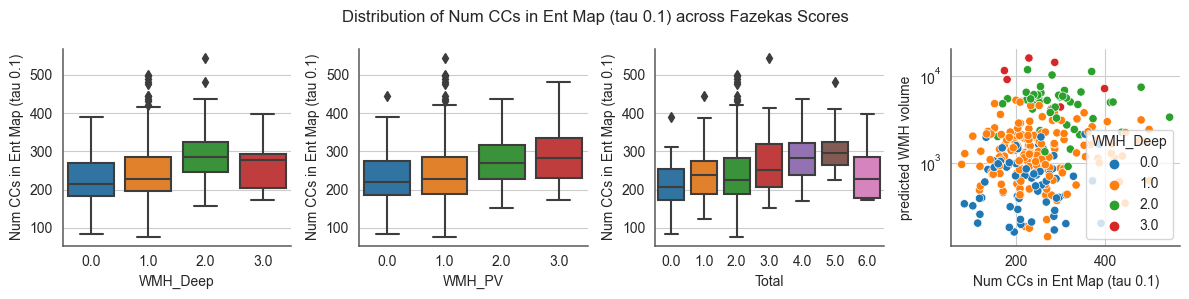

In [197]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.1_cc_num', ylabel='Num CCs in Ent Map (tau 0.1)', kind='box')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


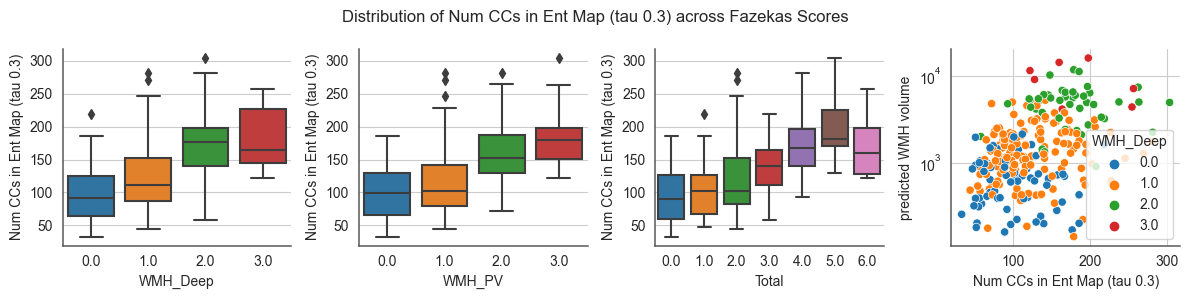

In [198]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.3_cc_num', ylabel='Num CCs in Ent Map (tau 0.3)', kind='box')

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


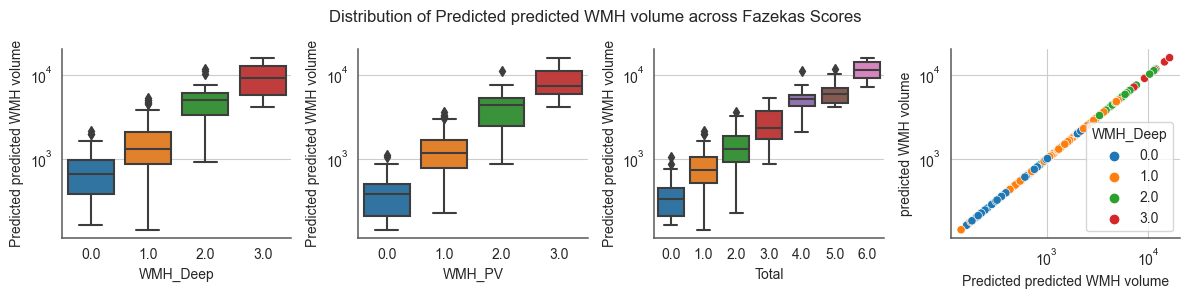

In [199]:
quad_fazekas_comparison_plot_box(combined_df, y='pred0.5_seg_volume', ylabel='Predicted predicted WMH volume', kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


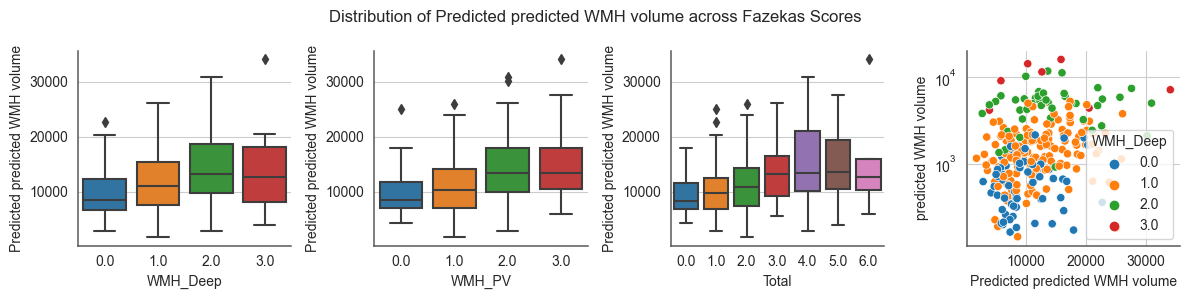

In [200]:
quad_fazekas_comparison_plot_box(combined_df, y='pred0.5_vent_volume', ylabel='Predicted predicted WMH volume', kind='box', logy=False)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


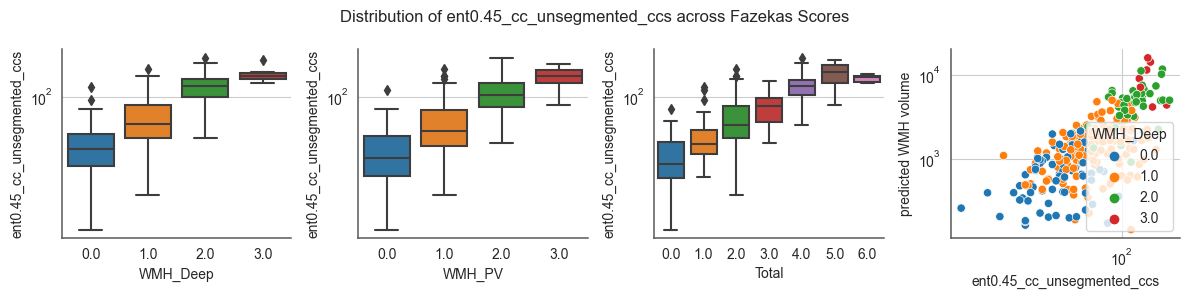

In [201]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.45_cc_unsegmented_ccs', ylabel=None, kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


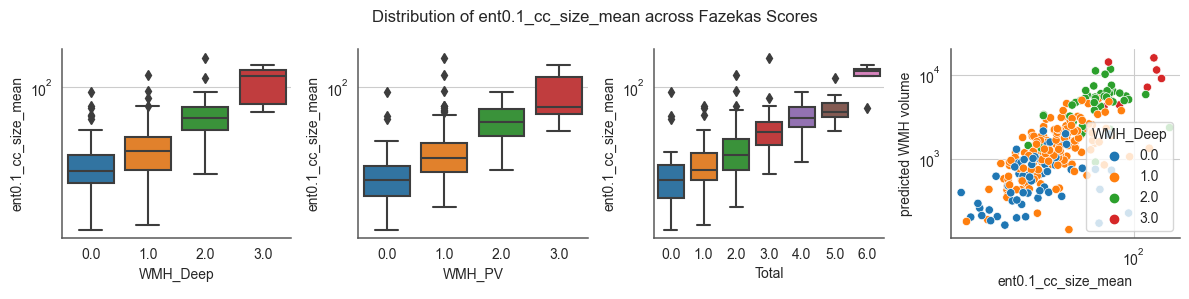

In [202]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.1_cc_size_mean', ylabel=None, kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


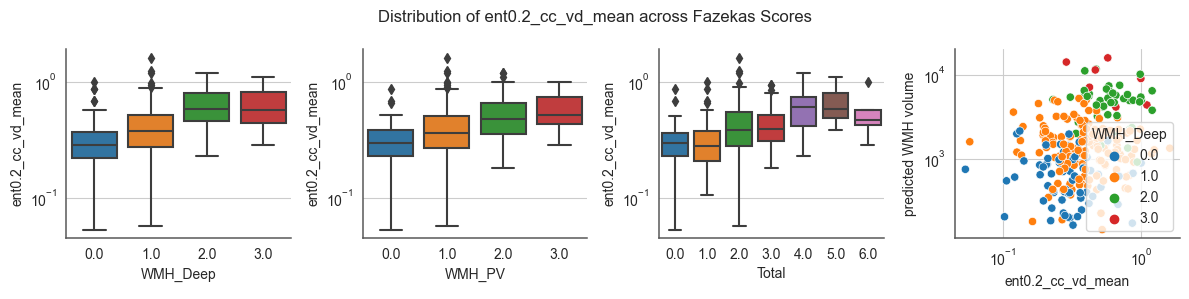

In [203]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.2_cc_vd_mean', ylabel=None, kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


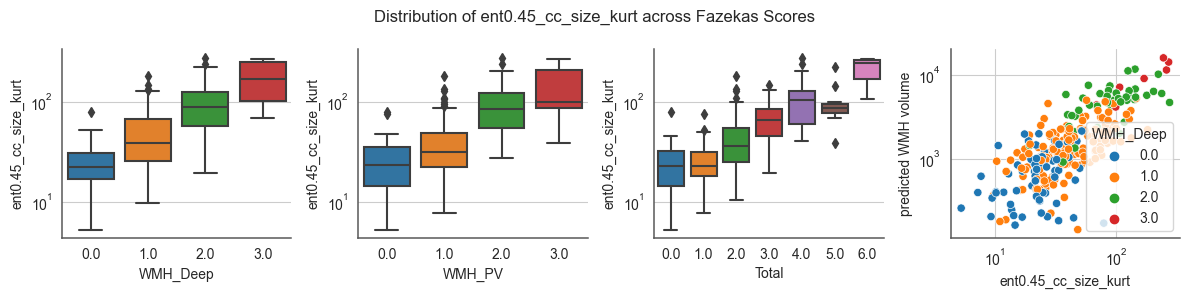

In [204]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.45_cc_size_kurt', ylabel=None, kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


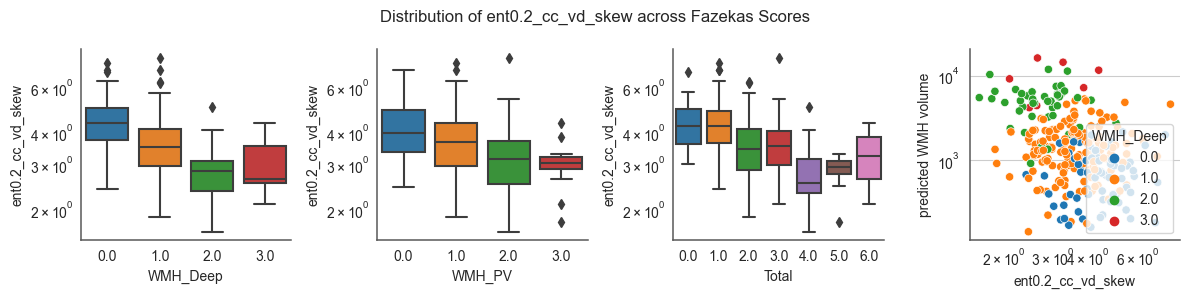

In [205]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.2_cc_vd_skew', ylabel=None, kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


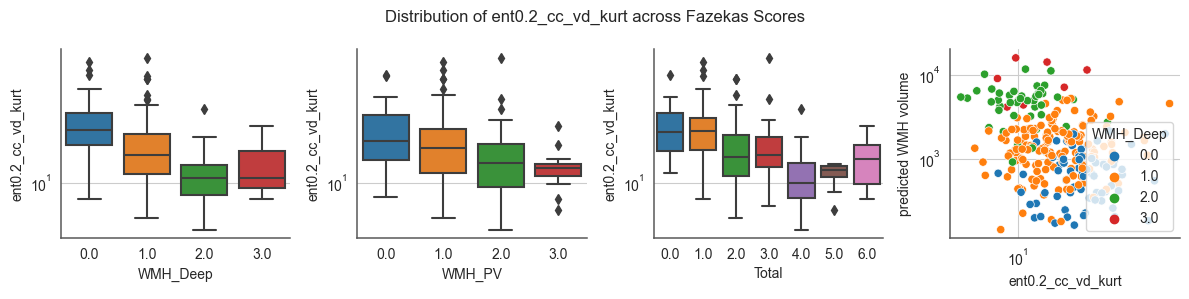

In [206]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.2_cc_vd_kurt', ylabel=None, kind='box', logy=True)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


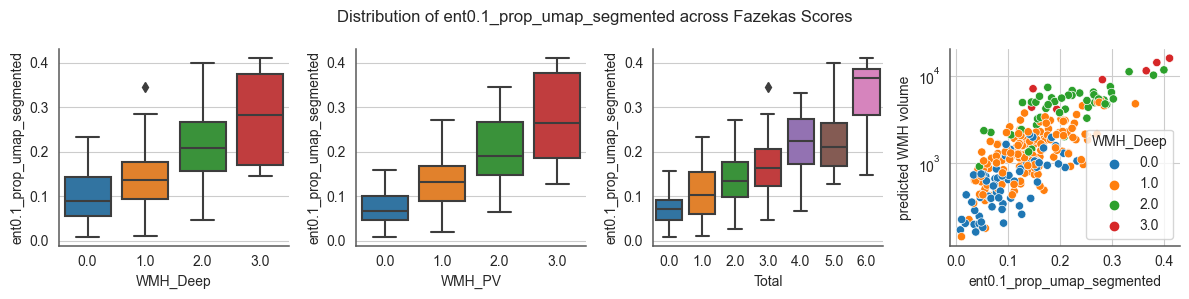

In [207]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.1_prop_umap_segmented', ylabel=None, kind='box', logy=False)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


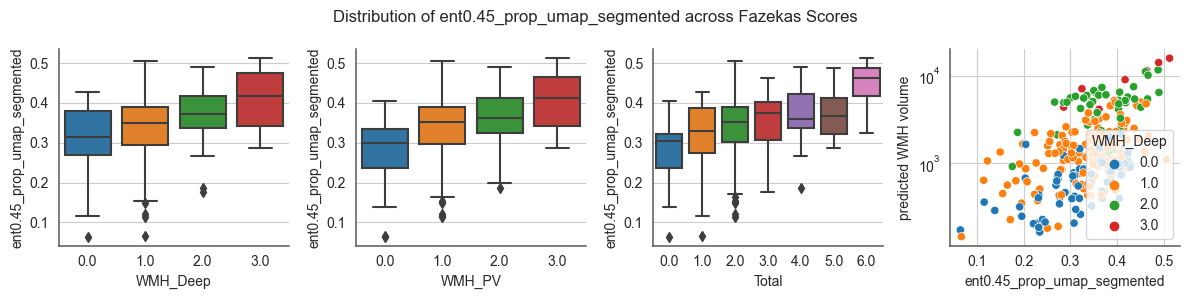

In [208]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.45_prop_umap_segmented', ylabel=None, kind='box', logy=False)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


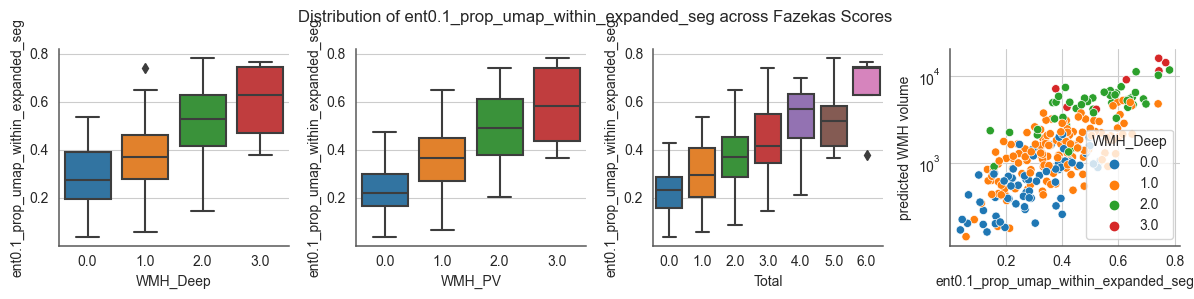

In [209]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.1_prop_umap_within_expanded_seg', ylabel=None, kind='box', logy=False)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


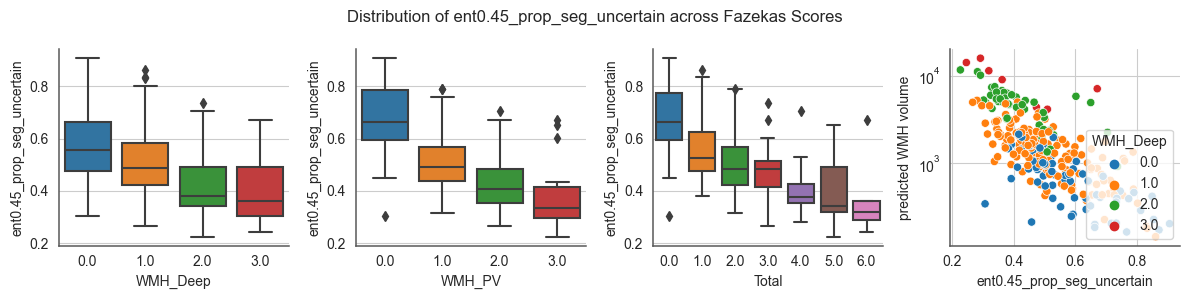

In [210]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.45_prop_seg_uncertain', ylabel=None, kind='box', logy=False)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


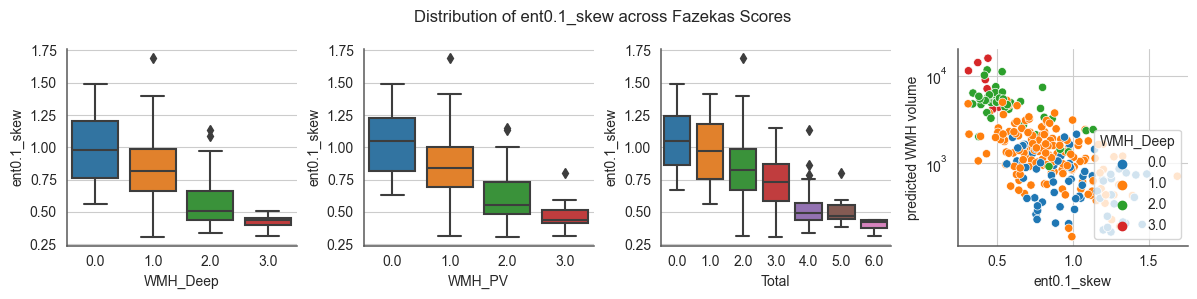

In [211]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.1_skew', ylabel=None, kind='box', logy=False)

/tmp/ipykernel_752629/1825947614.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.scatterplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=sns.color_palette())


[0. 1. 2. 3.]


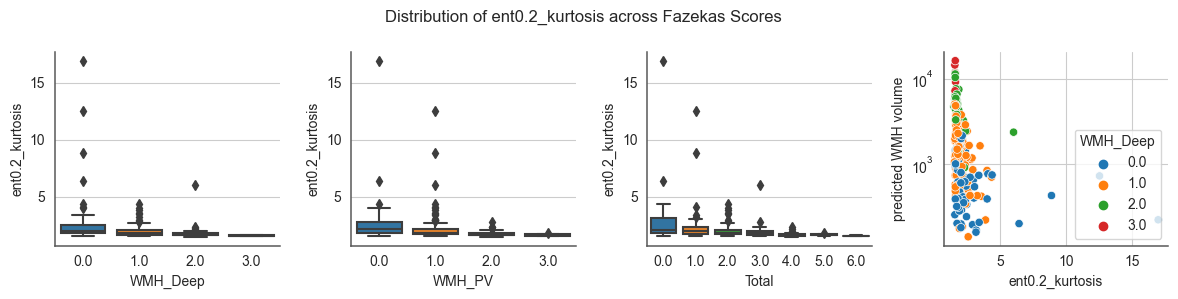

In [212]:
quad_fazekas_comparison_plot_box(combined_df, y='ent0.2_kurtosis', ylabel=None, kind='box')